In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../Data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data = data.drop(['Time','Amount'] , axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Data - Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1 ; 이진분류)

In [3]:
# 데이터 내 NA값 여부 확인
# 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행
data.isnull().any()    

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [4]:
print('Credit Card Fraud Detection data - row:', data.shape[0], 'Columns:', data.shape[1])

Credit Card Fraud Detection data - row: 284807 Columns: 29


In [5]:
# 요약 통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,2.239751e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [6]:
# 종속 변수의 분포 확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

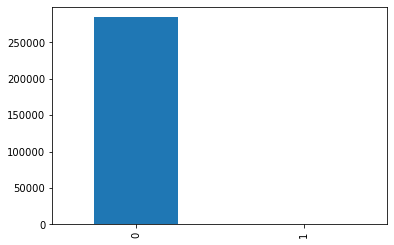

In [8]:
data['Class'].value_counts().plot(kind='bar')

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 1. EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

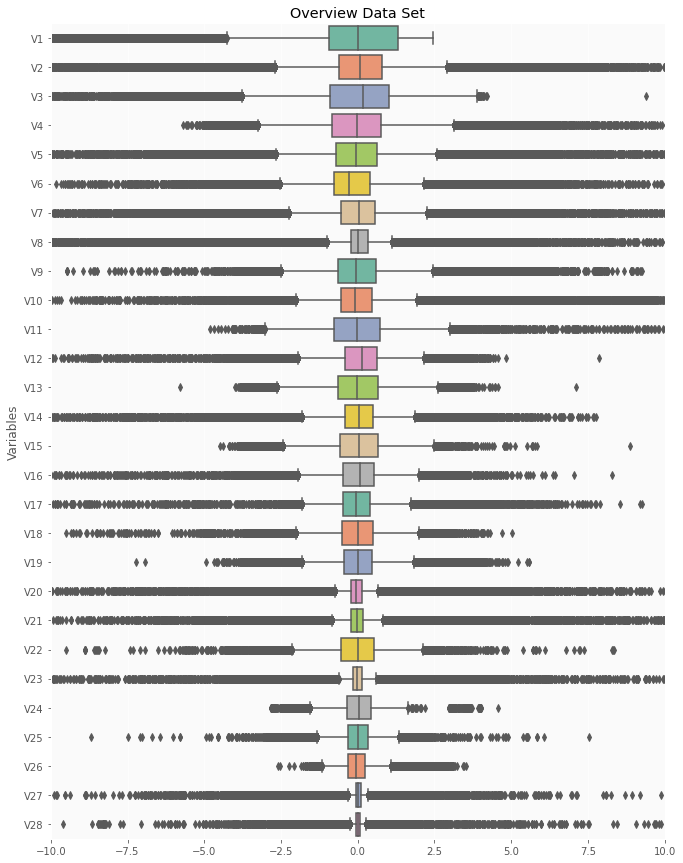

In [11]:
plt.style.use('ggplot') #Using ggplot2 style visuals

fig , ax = plt.subplots(figsize=(11,15)) #Graph Size

ax.set_facecolor('#FAFAFA') # Graph Color
ax.set(xlim = (-10, 10)) # Specify the X-axis range
plt.ylabel('Variables') # Name Y-axis
plt.title('Overview Data Set') # Title of Graph

ax = sns.boxplot(data = data.drop(columns = ['Class']), 
                 orient='h',
                 palette='Set2')

In [19]:
data.columns.values[:-1]

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype=object)

- 각 컬럼 별 클래스 분포 확인

<Figure size 432x288 with 0 Axes>

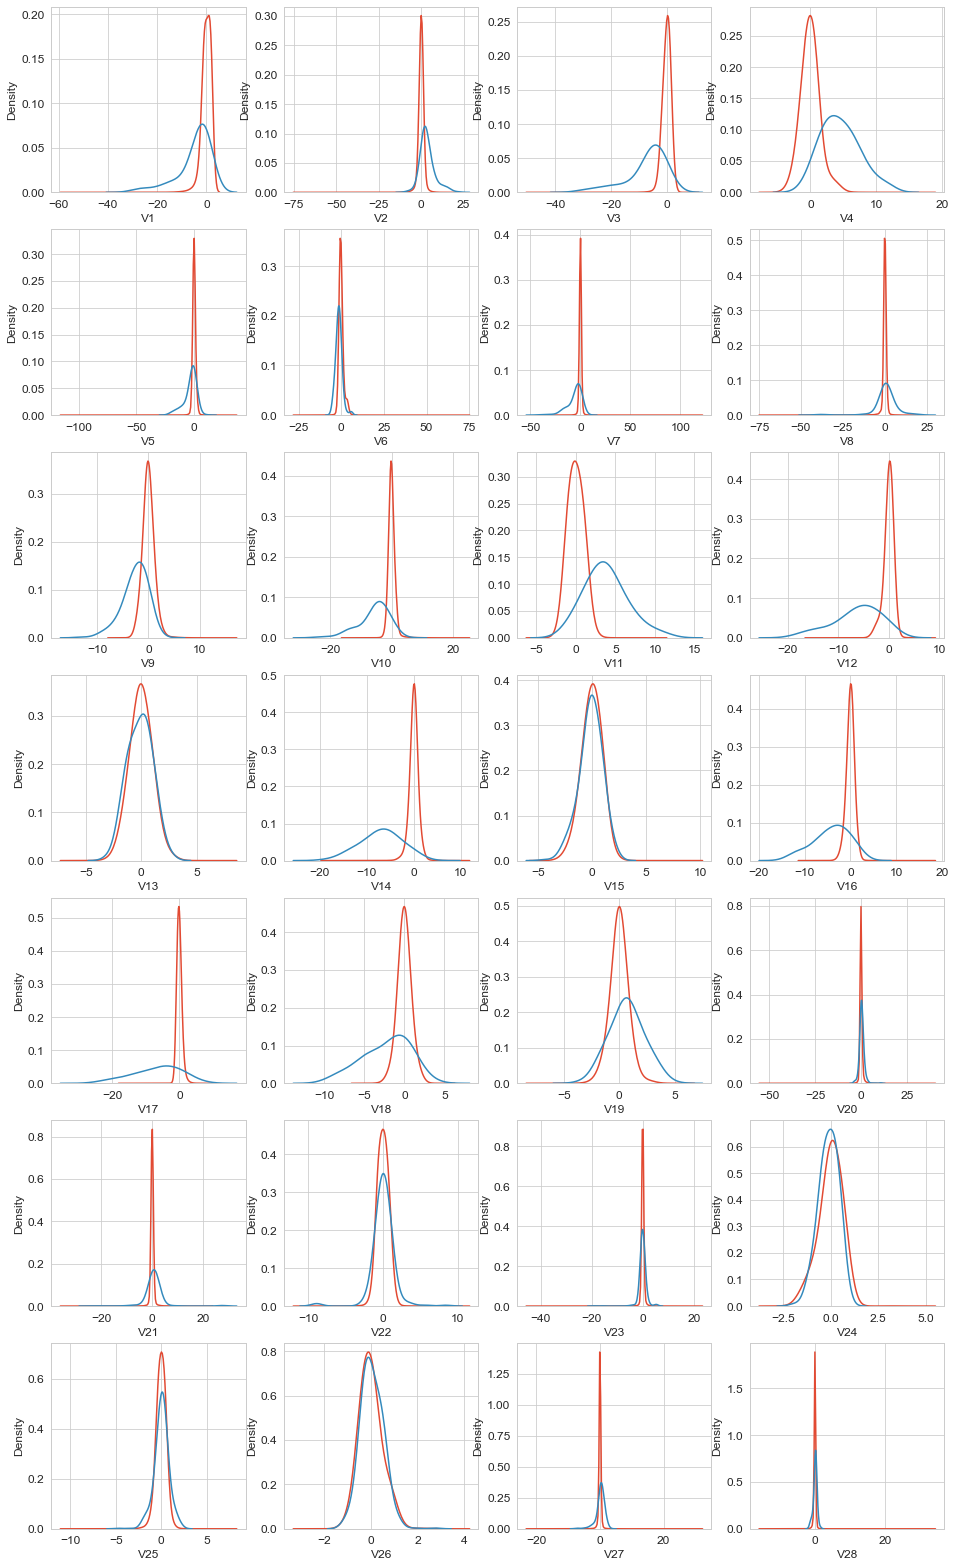

In [18]:
col = data.columns.values[:-1] # Class를 제외한 모든 컬럼 
i = 0
t0 = data.loc[data['Class'] == 0] #Class 0
t1 = data.loc[data['Class'] == 1] #Class 1

sns.set_style('whitegrid') #graph style
plt.figure()

fig, ax = plt.subplots(8,4 , figsize=(16,28))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw_method = 0.5, label = 'Class = 0')
    sns.kdeplot(t1[feature], bw_method = 0.5, label = 'Class = 1')
    plt.xlabel(feature, fontsize = 12) 
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which = 'major', labelsize=12)

plt.show()

In [21]:
X = np.array(data.iloc[:, data.columns !='Class'])
y = np.array(data.iloc[:, data.columns =='Class'])

print(X.shape, y.shape)

(284807, 28) (284807, 1)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 235)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 28) (56962, 28) (227845, 1) (56962, 1)


In [24]:
# 평가 지표 함수(이진 분류)
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[0][1] + cf_matrix[1][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][0] + cf_matrix[1][1])
    F1_Score = (2* Recall * Precision) / (Recall + Precision)
    
    print('Model_Evluation with Label : 1')
    print('Accuracy:' , Accuracy)
    print('Precision:' , Precision)
    print('Recall:', Recall)
    print('F1_Score:' , F1_Score)

## 2. Modeling

#### 1) LightGBM : LGBMClassifier

In [25]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [26]:
X_train.shape

(227845, 28)

In [29]:
y_train.shape

(227845, 1)

In [30]:
lgbm_clf = LGBMClassifier(max_depth = 64,
                          n_estimators = 100,
                          objective = 'binary',
                          learning_rate = 0.01,
                          num_leaves = 32
                           )
evals = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train.ravel(), eval_metric='auc', eval_set=evals, verbose = False)  # True로 할경우 학습 과정이 프린트 됨
lgbm_clf_predict = lgbm_clf.predict(X_test)
model_evaluation(y_test, lgbm_clf_predict)

C:\Users\siras\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model_Evluation with Label : 1
Accuracy: 0.999385555282469
Precision: 0.9295774647887324
Recall: 0.6875
F1_Score: 0.7904191616766466


#### 2) SMOTE을 이용한 OverSampling

In [31]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(227845, 28) (227845, 1) (56962, 28) (56962, 1)


In [32]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=235, sampling_strategy=0.2) # 20 % 증가
X_train_over, y_train_over = smote.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, Count of label '1' : {}".format(sum(y_train_over ==1)))
print("After OverSampling, Count of label '0' : {}".format(sum(y_train_over ==0)))

After OverSampling, Count of label '1' : 45489
After OverSampling, Count of label '0' : 227449


In [37]:
print(X_train.shape, y_train.shape, X_train_over.shape, y_train_over.shape)

(227845, 28) (227845, 1) (272938, 28) (272938,)


In [38]:
lgbm_clf2 = LGBMClassifier(max_depth = 64,
                          n_estimators = 100,
                          objective = 'binary',
                          learning_rate = 0.01,
                          num_leaves = 32
                           )
evals = [(X_test, y_test)]

lgbm_clf2.fit(X_train_over, y_train_over, eval_metric='auc', eval_set=evals, verbose = False)  # True로 할경우 학습 과정이 프린트 됨
lgbm_clf_predict2 = lgbm_clf2.predict(X_test)
model_evaluation(y_test, lgbm_clf_predict2)

C:\Users\siras\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model_Evluation with Label : 1
Accuracy: 0.9989466661985184
Precision: 0.652542372881356
Recall: 0.8020833333333334
F1_Score: 0.719626168224299


- Oversampling 비율 높이기

In [39]:
print("Before OverSampling, Count of label '1' : {}".format(sum(y_train ==1)))
print("Before OverSampling, Count of label '0' : {}".format(sum(y_train ==0)))

smote = SMOTE(random_state=235, sampling_strategy=0.6) # 60 % 증가
X_train_over2, y_train_over2 = smote.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, Count of label '1' : {}".format(sum(y_train_over2 ==1)))
print("After OverSampling, Count of label '0' : {}".format(sum(y_train_over2 ==0)))

Before OverSampling, Count of label '1' : [396]
Before OverSampling, Count of label '0' : [227449]
After OverSampling, Count of label '1' : 136469
After OverSampling, Count of label '0' : 227449


In [41]:
lgbm_clf3 = LGBMClassifier(max_depth = 64,
                          n_estimators = 100,
                          objective = 'binary',
                          learning_rate = 0.01,
                          num_leaves = 32
                           )
evals = [(X_test, y_test)]

lgbm_clf3.fit(X_train_over2, y_train_over2, eval_metric='auc', eval_set=evals, verbose = False)  # True로 할경우 학습 과정이 프린트 됨
lgbm_clf_predict3 = lgbm_clf3.predict(X_test)
model_evaluation(y_test, lgbm_clf_predict3)

C:\Users\siras\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model_Evluation with Label : 1
Accuracy: 0.9947157754292335
Precision: 0.22070844686648503
Recall: 0.84375
F1_Score: 0.34989200863930886


- 1:1 Over sampling

In [42]:
print("Before OverSampling, Count of label '1' : {}".format(sum(y_train ==1)))
print("Before OverSampling, Count of label '0' : {}".format(sum(y_train ==0)))

smote = SMOTE(random_state=235, sampling_strategy='auto') 
X_train_over3, y_train_over3 = smote.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, Count of label '1' : {}".format(sum(y_train_over3 ==1)))
print("After OverSampling, Count of label '0' : {}".format(sum(y_train_over3 ==0)))

Before OverSampling, Count of label '1' : [396]
Before OverSampling, Count of label '0' : [227449]
After OverSampling, Count of label '1' : 227449
After OverSampling, Count of label '0' : 227449


In [43]:
lgbm_clf4 = LGBMClassifier(max_depth = 64,
                          n_estimators = 100,
                          objective = 'binary',
                          learning_rate = 0.01,
                          num_leaves = 32
                           )
evals = [(X_test, y_test)]

lgbm_clf4.fit(X_train_over3, y_train_over3, eval_metric='auc', eval_set=evals, verbose = False)  # True로 할경우 학습 과정이 프린트 됨
lgbm_clf_predict4 = lgbm_clf4.predict(X_test)
model_evaluation(y_test, lgbm_clf_predict4)

C:\Users\siras\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model_Evluation with Label : 1
Accuracy: 0.9875004388890839
Precision: 0.10613810741687979
Recall: 0.8645833333333334
F1_Score: 0.18906605922551253


#### 3)BLSM과 비교

In [44]:
from imblearn.over_sampling import BorderlineSMOTE

In [46]:
blsm = BorderlineSMOTE(random_state =235 , sampling_strategy=0.3)
X_train_blsm, y_train_blsm = blsm.fit_sample(X_train, y_train.ravel())
print(X_train.shape, y_train.shape, X_train_blsm.shape, y_train_blsm.shape)

(227845, 28) (227845, 1) (295683, 28) (295683,)


In [47]:
lgbm_clf5 = LGBMClassifier(max_depth = 64,
                          n_estimators = 100,
                          objective = 'binary',
                          learning_rate = 0.01,
                          num_leaves = 32
                           )
evals = [(X_test, y_test)]

lgbm_clf5.fit(X_train_blsm, y_train_blsm, eval_metric='auc', eval_set=evals, verbose = False)  # True로 할경우 학습 과정이 프린트 됨
lgbm_clf_predict5 = lgbm_clf5.predict(X_test)
model_evaluation(y_test, lgbm_clf_predict5)

C:\Users\siras\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model_Evluation with Label : 1
Accuracy: 0.9989466661985184
Precision: 0.6578947368421053
Recall: 0.78125
F1_Score: 0.7142857142857143


### 3. 다양한 모델에 적용(SMOTE 사용)
- 선형회귀(로지스틱), Random Forest, CatBoost

In [49]:
# Before over sampling
from sklearn.linear_model import LogisticRegression
lr_reg = LogisticRegression(C=1e+10, 
                           class_weight= 'balanced',
                           multi_class = 'ovr'
                           )

lr_reg.fit(X_train, y_train)
lr_reg_predict = lr_reg.predict(X_test)
model_evaluation(y_test, lr_reg_predict)

C:\Users\siras\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model_Evluation with Label : 1
Accuracy: 0.9769846564376251
Precision: 0.061371841155234655
Recall: 0.8854166666666666
F1_Score: 0.11478730587440918


In [51]:
# BLSM oversampling
lr_reg = LogisticRegression(C=1e+10, 
                           class_weight= 'balanced',
                           multi_class = 'ovr'
                           )

lr_reg.fit(X_train_blsm, y_train_blsm)
lr_reg_predict = lr_reg.predict(X_test)
model_evaluation(y_test, lr_reg_predict)

Model_Evluation with Label : 1
Accuracy: 0.9895895509286893
Precision: 0.12291350531107739
Recall: 0.84375
F1_Score: 0.21456953642384108


C:\Users\siras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# 라쏘 로지스틱 회귀모형 학습
lr_reg2 = LogisticRegression(class_weight= 'balanced',
                           multi_class = 'ovr',
                           penalty = 'l1',
                           solver='liblinear'
                           )

lr_reg2.fit(X_train_blsm, y_train_blsm)
lr_reg_predict2 = lr_reg2.predict(X_test)
model_evaluation(y_test, lr_reg_predict2)

Model_Evluation with Label : 1
Accuracy: 0.9895719953653312
Precision: 0.12272727272727273
Recall: 0.84375
F1_Score: 0.21428571428571427


In [54]:
print(np.sum(lr_reg_predict==1))
print(np.sum(lr_reg_predict2==1))

659
660


In [55]:
# 릿지 로지스틱 회귀모형 학습
lr_reg3 = LogisticRegression(class_weight= 'balanced',
                           multi_class = 'ovr',
                           penalty = 'l2',
                           solver='lbfgs'
                           )

lr_reg3.fit(X_train_blsm, y_train_blsm)
lr_reg_predict3 = lr_reg3.predict(X_test)
model_evaluation(y_test, lr_reg_predict3)

Model_Evluation with Label : 1
Accuracy: 0.9895895509286893
Precision: 0.12291350531107739
Recall: 0.84375
F1_Score: 0.21456953642384108


C:\Users\siras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
print(np.sum(lr_reg_predict==1))
print(np.sum(lr_reg_predict2==1))
print(np.sum(lr_reg_predict3==1))

659
660
659


- RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50,
                                max_depth=10,
                                random_state = 235)
rf_clf.fit(X_train_over, y_train_over)
rf_clf_predict = rf_clf.predict(X_test)
model_evaluation(y_test, rf_clf_predict)

Model_Evluation with Label : 1
Accuracy: 0.9992099996488887
Precision: 0.7524752475247525
Recall: 0.7916666666666666
F1_Score: 0.7715736040609136


In [58]:
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(max_depth = 10,
                           learning_rate =0.01,
                           n_estimators= 50,
                           loss_function = 'Logloss'
                           )
cb_clf.fit(X_train_over, y_train_over)
cb_clf_predict = cb_clf.predict(X_test)
model_evaluation(y_test, cb_clf_predict)

0:	learn: 0.6709483	total: 352ms	remaining: 17.2s
1:	learn: 0.6458912	total: 556ms	remaining: 13.3s
2:	learn: 0.6207189	total: 791ms	remaining: 12.4s
3:	learn: 0.5992760	total: 1.01s	remaining: 11.6s
4:	learn: 0.5798354	total: 1.22s	remaining: 11s
5:	learn: 0.5576013	total: 1.41s	remaining: 10.3s
6:	learn: 0.5400209	total: 1.58s	remaining: 9.71s
7:	learn: 0.5203629	total: 1.76s	remaining: 9.25s
8:	learn: 0.5016508	total: 1.95s	remaining: 8.89s
9:	learn: 0.4813556	total: 2.13s	remaining: 8.53s
10:	learn: 0.4642095	total: 2.3s	remaining: 8.17s
11:	learn: 0.4483228	total: 2.48s	remaining: 7.86s
12:	learn: 0.4323683	total: 2.66s	remaining: 7.58s
13:	learn: 0.4184839	total: 2.86s	remaining: 7.35s
14:	learn: 0.4043581	total: 3.03s	remaining: 7.06s
15:	learn: 0.3916204	total: 3.2s	remaining: 6.8s
16:	learn: 0.3776225	total: 3.38s	remaining: 6.57s
17:	learn: 0.3661379	total: 3.56s	remaining: 6.33s
18:	learn: 0.3530122	total: 3.76s	remaining: 6.13s
19:	learn: 0.3403915	total: 3.96s	remaining: 5

## 4. Ensemble
- 성능이 가장 좋은 Random Forest 모델을 바탕으로 진행

In [59]:
#Bagging
import random
bagging_predict_result = []
number_of_bagging = 5 

for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_over.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_over.shape[0]) # 랜덤으로 선택
    X = pd.DataFrame(X_train_over).iloc[random_data_index,]
    y = pd.DataFrame(y_train_over).iloc[random_data_index]
    model = RandomForestClassifier(n_estimators=50,
                                max_depth=10) 
    model.fit(X, y)
    predict = model.predict(X_test)
    bagging_predict_result.append(predict)
    print(_+1, 'Model Evaluation Result:', '\n')
    model_evaluation(y_test, predict)

<ipython-input-59-637ebfd906e0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


1 Model Evaluation Result: 

Model_Evluation with Label : 1
Accuracy: 0.9991748885221726
Precision: 0.7333333333333333
Recall: 0.8020833333333334
F1_Score: 0.7661691542288558


<ipython-input-59-637ebfd906e0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


2 Model Evaluation Result: 

Model_Evluation with Label : 1
Accuracy: 0.9991748885221726
Precision: 0.7333333333333333
Recall: 0.8020833333333334
F1_Score: 0.7661691542288558


<ipython-input-59-637ebfd906e0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


3 Model Evaluation Result: 

Model_Evluation with Label : 1
Accuracy: 0.9991573329588147
Precision: 0.7307692307692307
Recall: 0.7916666666666666
F1_Score: 0.76


<ipython-input-59-637ebfd906e0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


4 Model Evaluation Result: 

Model_Evluation with Label : 1
Accuracy: 0.9992099996488887
Precision: 0.7428571428571429
Recall: 0.8125
F1_Score: 0.7761194029850748


<ipython-input-59-637ebfd906e0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


5 Model Evaluation Result: 

Model_Evluation with Label : 1
Accuracy: 0.9991748885221726
Precision: 0.7378640776699029
Recall: 0.7916666666666666
F1_Score: 0.7638190954773869


- Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [61]:
bagging_predict = []

for lst2_index in range(X_test.shape[0]): #테스트 데이터 개수만큼 반복
    temp_predict = [] #반복문 내 임시 빈 리스트 생성
    for lst_index in range(len(bagging_predict_result)): #Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) #각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    
    if np.mean(temp_predict) >=0.5:
        bagging_predict.append(1)
    
    elif np.mean(temp_predict) < 0.5:
        bagging_predict.append(0)

model_evaluation(y_test, bagging_predict)

Model_Evluation with Label : 1
Accuracy: 0.9992099996488887
Precision: 0.7475728155339806
Recall: 0.8020833333333334
F1_Score: 0.7738693467336684


In [62]:
bagging_predict_result

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [63]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
model.predict_proba(X_test)[:, 1]

array([0.00559273, 0.01164276, 0.02229517, ..., 0.00583754, 0.00346739,
       0.01090335])

In [66]:
#좀 더 간단한 알고리즘
bagging_predict_result = 0
number_of_bagging = 5 

for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_over.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_over.shape[0]) # 랜덤으로 선택
    X = pd.DataFrame(X_train_over).iloc[random_data_index,]
    y = pd.DataFrame(y_train_over).iloc[random_data_index]
    model = RandomForestClassifier(n_estimators=50,
                                max_depth=10) 
    model.fit(X, y)
    predict = model.predict_proba(X_test)[:,1]
    bagging_predict_result = bagging_predict_result + (predict)
    print(i)

<ipython-input-66-442cdeef569a>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


0


<ipython-input-66-442cdeef569a>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


1


<ipython-input-66-442cdeef569a>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


2


<ipython-input-66-442cdeef569a>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


3


<ipython-input-66-442cdeef569a>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


4


In [67]:
pred = np.repeat(0, len(y_test))
pred[bagging_predict_result / 5 > 0.5] = 1
model_evaluation(y_test, pred)

Model_Evluation with Label : 1
Accuracy: 0.9991397773954567
Precision: 0.7238095238095238
Recall: 0.7916666666666666
F1_Score: 0.7562189054726368


In [68]:
def cut_off(y,threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

In [69]:
threshold = np.arange(0,1, 0.1)

In [70]:
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [71]:
for i in threshold:
    pred_y = cut_off(bagging_predict_result / 5, i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evluation with Label : 1
Accuracy: 0.0016853340823707033
Precision: 0.0016853340823707033
Recall: 1.0
F1_Score: 0.003364997020575555
0.1
Model_Evluation with Label : 1
Accuracy: 0.9845686598082932
Precision: 0.08919202518363065
Recall: 0.8854166666666666
F1_Score: 0.16205910390848427
0.2
Model_Evluation with Label : 1
Accuracy: 0.997489554439802
Precision: 0.38967136150234744
Recall: 0.8645833333333334
F1_Score: 0.5372168284789645
0.30000000000000004
Model_Evluation with Label : 1
Accuracy: 0.99875355500158
Precision: 0.5899280575539568
Recall: 0.8541666666666666
F1_Score: 0.6978723404255319
0.4
Model_Evluation with Label : 1
Accuracy: 0.9989115550718023
Precision: 0.639344262295082
Recall: 0.8125
F1_Score: 0.7155963302752295
0.5
Model_Evluation with Label : 1
Accuracy: 0.9991397773954567
Precision: 0.7238095238095238
Recall: 0.7916666666666666
F1_Score: 0.7562189054726368
0.6000000000000001
Model_Evluation with Label : 1
Accuracy: 0.9992626663389628
Precision: 0.775510204081